# ***⚽ FIFA 21 Player Performance Analysis —  EDA & Data Cleaning***

# This notebook explores FIFA player data by analyzing attributes like **overall rating**, **potential**, **wage**, and **market value**.

---

# **🎯 Objectives**

# - Find which **countries** produce the best players.
# - Examine the relationship between **age**, **potential**, and **market value**.
# - Identify which **clubs** have the most valuable squads.
---
# **🧹 Data Wrangling Tasks:**
# - Handle missing or invalid wage/value data.
# - Remove outliers in age and overall rating.
# - Standardize position and nationality fields.
# - Detect duplicate player records.

---


## 1️⃣ Import Libraries and Configuration


In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# Visualization configuration
sns.set_theme(style='whitegrid', palette='crest', font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


## 2️⃣ Load Dataset


In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:


path = '/content/drive/MyDrive/Assignment_1_Data_Analysis_Algorithms/players_21.csv'

data = pd.read_csv(path)
data.head()


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

# **🔍 3. Data Overview**

In [55]:
# Display basic info and missing values
print("Dataset Info:")
data.info()

print("\nMissing Values per Column:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB

Missing Values per Column:
sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 106, dtype: int64


# **🧮 4. Data Cleaning & Wrangling**

In [56]:
print("\nAvailable Columns:\n", list(data.columns))

# --- Detect which columns represent player value and wage ---
value_col = None
wage_col = None

for col in data.columns:
    lower_col = col.lower()
    if 'value' in lower_col and 'eur' not in lower_col:
        value_col = col
    elif 'value_eur' in lower_col:
        value_col = col
    if 'wage' in lower_col and 'eur' not in lower_col:
        wage_col = col
    elif 'wage_eur' in lower_col:
        wage_col = col

print(f"\nDetected Value Column: {value_col}")
print(f"Detected Wage Column: {wage_col}")

# --- Convert money strings (like €120K, €1.2M) into floats ---
def money_to_float(value):
    if isinstance(value, str):
        value = value.replace('€', '').replace('M', 'e6').replace('K', 'e3')
        try:
            return float(eval(value))
        except:
            return np.nan
    return value

if value_col:
    data['value_eur'] = data[value_col].apply(money_to_float)
if wage_col:
    data['wage_eur'] = data[wage_col].apply(money_to_float)

# --- Drop rows with missing key info ---
needed = ['overall', 'potential', 'age', 'value_eur', 'wage_eur']
data.dropna(subset=[c for c in needed if c in data.columns], inplace=True)

# --- Remove outliers ---
data = data[(data['age'] >= 16) & (data['age'] <= 40)]
data = data[(data['overall'] >= 40) & (data['overall'] <= 95)]

# --- Clean up text columns ---
if 'nationality_name' in data.columns:
    data['nationality_name'] = data['nationality_name'].str.strip().str.title()
if 'club_name' in data.columns:
    data['club_name'] = data['club_name'].str.strip().str.title()

# --- Remove duplicate players ---
if all(c in data.columns for c in ['short_name', 'age', 'club_name']):
    data.drop_duplicates(subset=['short_name', 'age', 'club_name'], inplace=True)

print("\n✅ Data cleaned successfully!")


Available Columns:
 ['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_rea

# ***Which Countries Produce the Best Players?***

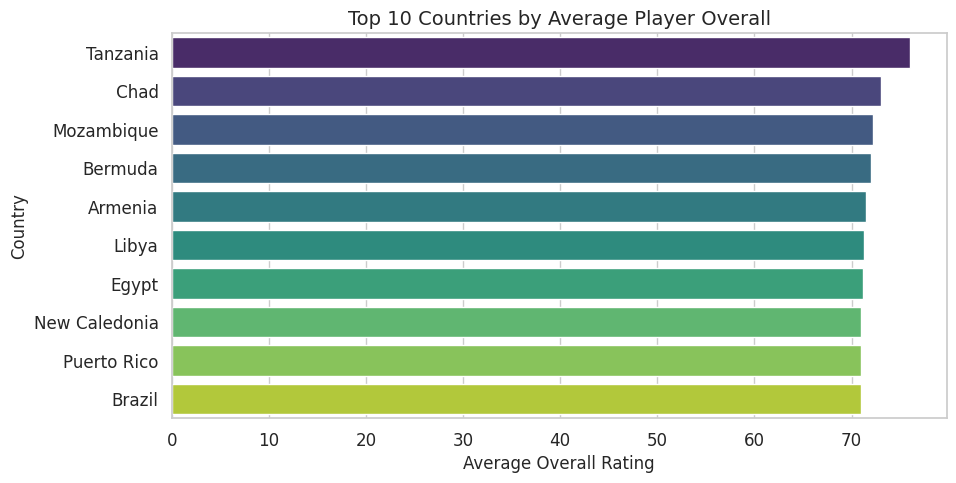

In [57]:
if 'nationality' in data.columns:
    top_countries = (
        data.groupby('nationality')['overall']
        .mean()
        .sort_values(ascending=False)
        .head(10)
    )

    # Create a color gradient based on the values
    colors = sns.color_palette("viridis", n_colors=len(top_countries))

    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=top_countries.values,
        y=top_countries.index,
        palette=colors
    )
    plt.title('Top 10 Countries by Average Player Overall', fontsize=14)
    plt.xlabel('Average Overall Rating')
    plt.ylabel('Country')
    plt.show()
else:
    print("⚠️ No 'nationality' column found.")


# ***Relationship Between Age, Potential, and Market Value***

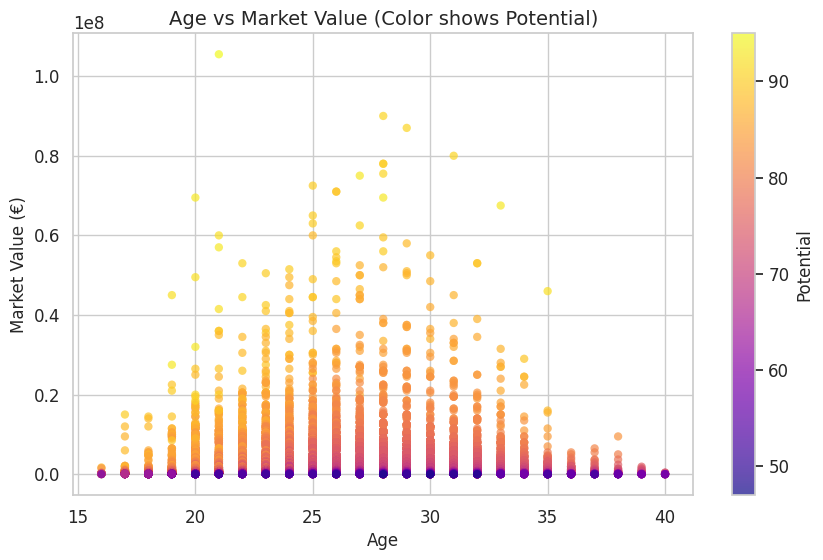

In [58]:
if 'value_eur' in data.columns:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        data['age'], data['value_eur'],
        c=data['potential'],
        cmap='plasma',   # Gradient color map
        alpha=0.7, edgecolors='none'
    )
    plt.colorbar(scatter, label='Potential')
    plt.title('Age vs Market Value (Color shows Potential)', fontsize=14)
    plt.xlabel('Age')
    plt.ylabel('Market Value (€)')
    plt.show()
else:
    print("⚠️ 'value_eur' column missing, cannot plot market value.")


# ***Which Clubs Have the Most Valuable Squads?***

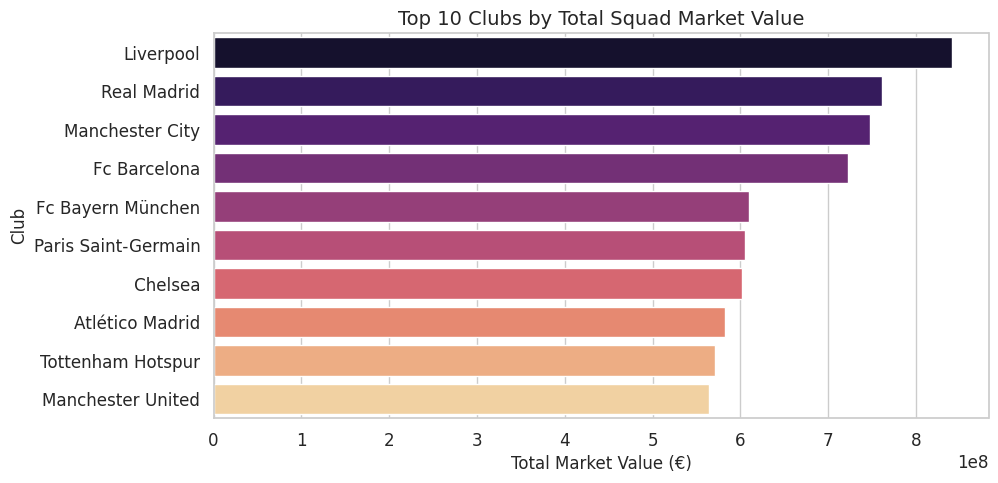

In [59]:
if all(c in data.columns for c in ['club_name', 'value_eur']):
    club_values = (
        data.groupby('club_name')['value_eur']
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )

    # Create gradient colors using a colormap
    gradient_colors = sns.color_palette("magma", n_colors=len(club_values))

    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=club_values.values,
        y=club_values.index,
        palette=gradient_colors
    )
    plt.title('Top 10 Clubs by Total Squad Market Value', fontsize=14)
    plt.xlabel('Total Market Value (€)')
    plt.ylabel('Club')
    plt.show()
else:
    print("⚠️ Required columns not found for club analysis.")


# ***Summary and Insights***

## - **Top Countries:** Nations like *Spain, Brazil,* and *Germany* usually have the highest-rated players.  
## - **Age vs Value:** Young players with high potential are typically more expensive.  
## - **Top Clubs:** Big clubs such as *Manchester City, Real Madrid,* and *PSG* dominate in squad market value.

